In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv('../data/raw/regularite-mensuelle-tgv-aqst.csv', sep=';')

# Aperçu
print(f"Dimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes")
print(f"\nColonnes :\n{df.columns.tolist()}")
df.head()

Dimensions : 10687 lignes, 26 colonnes

Colonnes :
['Date', 'Service', 'Gare de départ', "Gare d'arrivée", 'Durée moyenne du trajet', 'Nombre de circulations prévues', 'Nombre de trains annulés', 'Commentaire annulations', 'Nombre de trains en retard au départ', 'Retard moyen des trains en retard au départ', 'Retard moyen de tous les trains au départ', 'Commentaire retards au départ', "Nombre de trains en retard à l'arrivée", "Retard moyen des trains en retard à l'arrivée", "Retard moyen de tous les trains à l'arrivée", "Commentaire retards à l'arrivée", 'Nombre trains en retard > 15min', 'Retard moyen trains en retard > 15 (si liaison concurrencée par vol)', 'Nombre trains en retard > 30min', 'Nombre trains en retard > 60min', 'Prct retard pour causes externes', 'Prct retard pour cause infrastructure', 'Prct retard pour cause gestion trafic', 'Prct retard pour cause matériel roulant', 'Prct retard pour cause gestion en gare et réutilisation de matériel', 'Prct retard pour cause prise 

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,...,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
0,2018-01,National,GRENOBLE,PARIS LYON,183,245,0,NaN,37,8.027027,...,25,6.123741,13,6,17.647059,52.941176,0.000000,23.529412,5.882353,0.000000
1,2018-01,International,PARIS LYON,ITALIE,394,94,0,NaN,27,11.261728,...,22,11.601064,15,6,33.333333,19.047619,23.809524,14.285714,9.523810,0.000000
2,2018-01,National,MARSEILLE ST CHARLES,LYON PART DIEU,106,557,7,NaN,133,6.978195,...,40,5.195333,19,5,23.076923,23.076923,19.230769,23.076923,3.846154,7.692308
3,2018-01,National,PARIS NORD,DUNKERQUE,116,271,3,NaN,46,11.236594,...,18,3.738806,9,4,35.714286,28.571429,7.142857,25.000000,3.571429,0.000000
4,2018-01,National,ANNECY,PARIS LYON,224,198,0,NaN,12,8.070833,...,38,8.552525,14,5,23.809524,42.857143,9.523810,14.285714,4.761905,4.761905


In [2]:
# Types de données et valeurs manquantes
print("Types de données :")
print(df.dtypes)
print(f"\nValeurs manquantes :")
print(df.isnull().sum())

Types de données :
Date                                                                                            object
Service                                                                                         object
Gare de départ                                                                                  object
Gare d'arrivée                                                                                  object
Durée moyenne du trajet                                                                          int64
Nombre de circulations prévues                                                                   int64
Nombre de trains annulés                                                                         int64
Commentaire annulations                                                                        float64
Nombre de trains en retard au départ                                                             int64
Retard moyen des trains en retard au départ           

In [3]:
# Créer la variable cible : taux de régularité à l'arrivée
df['taux_regularite'] = 1 - (df['Nombre de trains en retard à l\'arrivée'] / df['Nombre de circulations prévues'])

# Convertir la date
df['Date'] = pd.to_datetime(df['Date'])
df['annee'] = df['Date'].dt.year
df['mois'] = df['Date'].dt.month

# Créer une liaison unique (départ - arrivée)
df['liaison'] = df['Gare de départ'] + ' - ' + df['Gare d\'arrivée']

# Aperçu de la variable cible
print(f"Taux de régularité :")
print(f"  Min : {df['taux_regularite'].min():.2%}")
print(f"  Max : {df['taux_regularite'].max():.2%}")
print(f"  Moyenne : {df['taux_regularite'].mean():.2%}")
print(f"\nNombre de liaisons uniques : {df['liaison'].nunique()}")
print(f"Période : {df['Date'].min()} à {df['Date'].max()}")


Taux de régularité :
  Min : 0.00%
  Max : 100.00%
  Moyenne : 86.33%

Nombre de liaisons uniques : 130
Période : 2018-01-01 00:00:00 à 2025-03-01 00:00:00


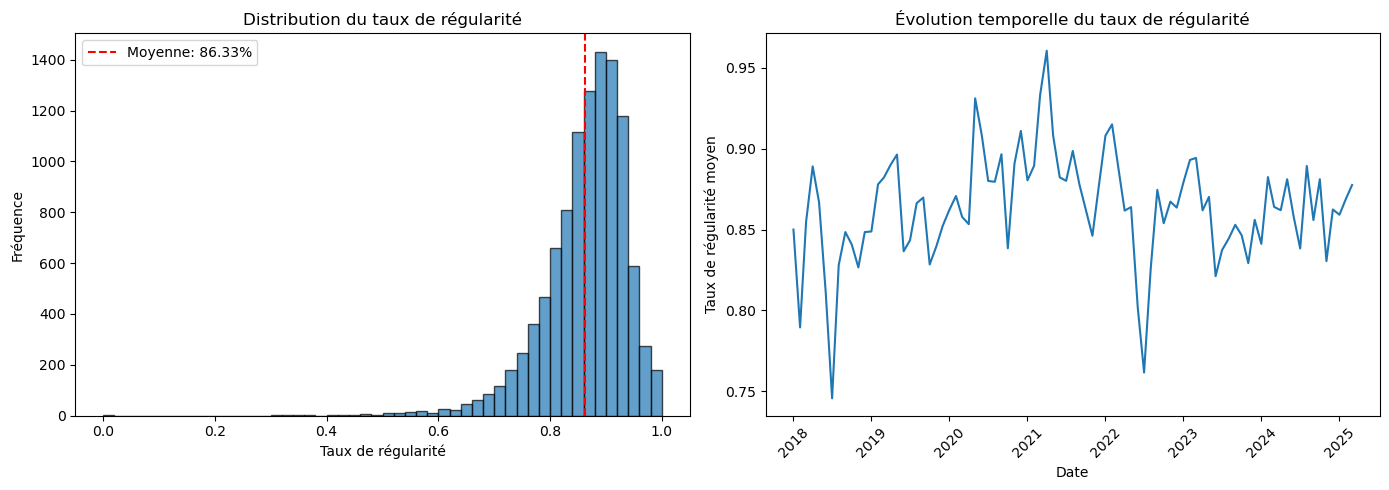

In [4]:
# Distribution du taux de régularité
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(df['taux_regularite'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Taux de régularité')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution du taux de régularité')
axes[0].axvline(df['taux_regularite'].mean(), color='red', linestyle='--', label=f"Moyenne: {df['taux_regularite'].mean():.2%}")
axes[0].legend()

# Evolution temporelle moyenne par mois
monthly_avg = df.groupby('Date')['taux_regularite'].mean()
axes[1].plot(monthly_avg.index, monthly_avg.values)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Taux de régularité moyen')
axes[1].set_title('Évolution temporelle du taux de régularité')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [5]:
# Colonnes utiles pour le modèle
features_cols = [
    'liaison', 'Service', 'annee', 'mois', 'Durée moyenne du trajet',
    'Nombre de circulations prévues', 'taux_regularite'
]

# Créer un DataFrame propre
df_model = df[features_cols].copy()

# Statistiques par liaison
stats_liaison = df.groupby('liaison').agg({
    'taux_regularite': ['mean', 'std', 'count'],
    'Nombre de circulations prévues': 'mean'
}).round(3)

stats_liaison.columns = ['regularite_moyenne', 'regularite_std', 'nb_observations', 'circulations_moyennes']
stats_liaison = stats_liaison.sort_values('regularite_moyenne', ascending=True)

print("Top 10 liaisons avec le PLUS de retards :")
print(stats_liaison.head(10))
print("\nTop 10 liaisons les PLUS ponctuelles :")
print(stats_liaison.tail(10))

Top 10 liaisons avec le PLUS de retards :
                                        regularite_moyenne  regularite_std  \
liaison                                                                      
ITALIE - PARIS LYON                                  0.700           0.121   
CHAMBERY CHALLES LES EAUX - PARIS LYON               0.749           0.097   
LYON PART DIEU - LILLE                               0.760           0.084   
MACON LOCHE - PARIS LYON                             0.769           0.091   
LYON PART DIEU - MARNE LA VALLEE                     0.776           0.077   
ARRAS - PARIS NORD                                   0.794           0.061   
LE MANS - PARIS MONTPARNASSE                         0.794           0.087   
MARSEILLE ST CHARLES - LILLE                         0.796           0.072   
DOUAI - PARIS NORD                                   0.796           0.065   
LYON PART DIEU - MARSEILLE ST CHARLES                0.802           0.064   

                     

In [6]:
from sklearn.preprocessing import LabelEncoder

# Créer le dataset final pour le modèle
df_ml = df[['liaison', 'Service', 'annee', 'mois', 
            'Durée moyenne du trajet', 'Nombre de circulations prévues', 
            'taux_regularite']].copy()

# Encoder les variables catégorielles
le_liaison = LabelEncoder()
le_service = LabelEncoder()

df_ml['liaison_encoded'] = le_liaison.fit_transform(df_ml['liaison'])
df_ml['service_encoded'] = le_service.fit_transform(df_ml['Service'])

# Features et target
feature_cols = ['liaison_encoded', 'service_encoded', 'annee', 'mois', 
                'Durée moyenne du trajet', 'Nombre de circulations prévues']
X = df_ml[feature_cols]
y = df_ml['taux_regularite']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures utilisées:")
for col in feature_cols:
    print(f"  - {col}")

# Sauvegarder les encoders pour plus tard
import pickle
import os

os.makedirs('../data/processed', exist_ok=True)
pickle.dump(le_liaison, open('../data/processed/le_liaison.pkl', 'wb'))
pickle.dump(le_service, open('../data/processed/le_service.pkl', 'wb'))
df_ml.to_csv('../data/processed/data_ml.csv', index=False)

print("\nDonnées sauvegardées dans data/processed/")

Features shape: (10687, 6)
Target shape: (10687,)

Features utilisées:
  - liaison_encoded
  - service_encoded
  - annee
  - mois
  - Durée moyenne du trajet
  - Nombre de circulations prévues

Données sauvegardées dans data/processed/
